# Introduction

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

An airline is a company that provides air transport services for traveling passengers and freight. Airlines use aircraft to supply these services and may form partnerships or alliances with other airlines for codeshare agreements, in which they both offer and operate the same flight. Generally, airline companies are recognized with an air operating certificate or license issued by a governmental aviation body. Airlines may be scheduled or charter operators.
Airlines assign prices to their services in an attempt to maximize profitability. The pricing of airline tickets has become increasingly complicated over the years and is now largely determined by computerized yield management systems.
The price of an Airline Ticket is affected by a number of factors, such as flight duration, days left for departure, arrival time and departure time etc. Airline organizations may diminish the cost at the time they need to build the market and at the time when the tickets are less accessible. They may maximize the costs. The price may rely upon different factors. Each factor has its own proprietary rules and algorithms to set the price accordingly. Recent advances in Artificial Intelligence (AI) and Machine Learning (ML) makes it possible to infer such rules and model the price variation.

# Dataset

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300152 datapoints and 11 features in the cleaned dataset.

# Features
The various features of the cleaned dataset are explained below:

**1) Airline:** The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines. <br>
**2) Flight:** Flight stores information regarding the plane's flight code. It is a categorical feature. <br>
**3) Source City:** City from which the flight takes off. It is a categorical feature having 6 unique cities. <br>
**4) Departure Time:** This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels. <br>
**5) Stops:** A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities. <br>
**6) Arrival Time:** This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time. <br>
**7) Destination City:** City where the flight will land. It is a categorical feature having 6 unique cities. <br>
**8) Class:** A categorical feature that contains information on seat class; it has two distinct values: Business and Economy. <br>
**9) Duration:** A continuous feature that displays the overall amount of time it takes to travel between cities in hours. <br>
**10)Days Left:** This is a derived characteristic that is calculated by subtracting the trip date by the booking date. <br>
**11) Price:** Target variable stores information of the ticket price. <br>

# Dataset Reference - https://www.kaggle.com/

### Importing all the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Reading the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\Dell\OneDrive\Documents\Flight Price Prediction\data.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Droping the useless column 'Unnamed: 0'

In [3]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Gather Data Type related information about the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


### Stastical Description of Data

In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


### Size of the Dataset 

In [6]:
df.shape

(300153, 11)

### To identify the most popular airline amongst all the airlines

In [7]:
df1=df.groupby(['flight','airline'],as_index=False).count()
print(df1.airline.value_counts())

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64


### Distribution of all the airlines

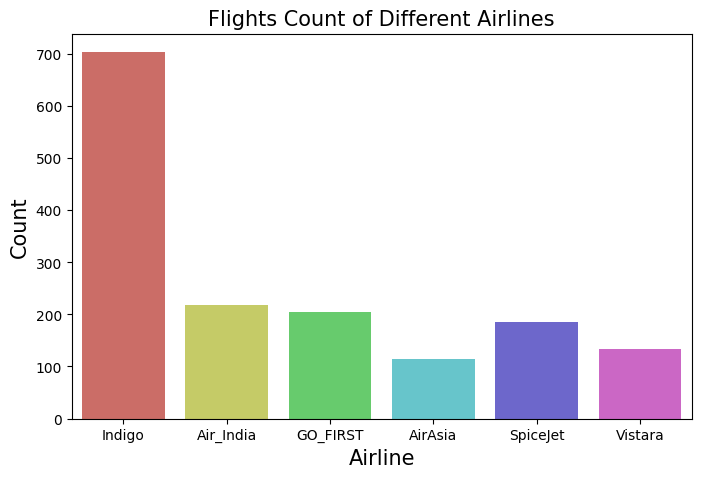

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x='airline',data=df1,palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**- Indigo is considered to be the most popular Airline**

### To identify the most preferred class of ticket

In [9]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
print(df2['class'].value_counts())

class
Economy     1560
Business     295
Name: count, dtype: int64


### Distribution of class-Economy and Business across all the airlines

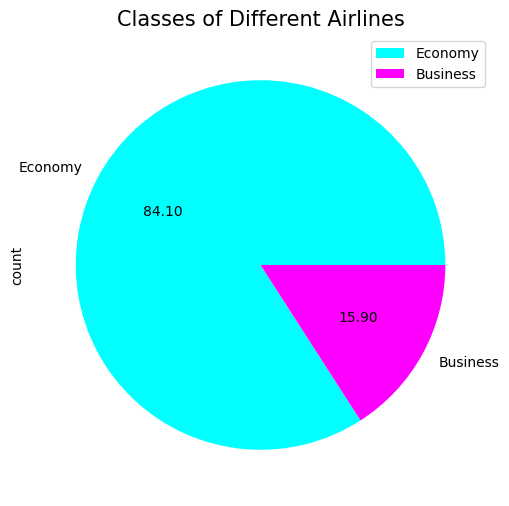

In [10]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

**- Economy class is the most preferred class of ticket**

### Variation of Price among different Airlines

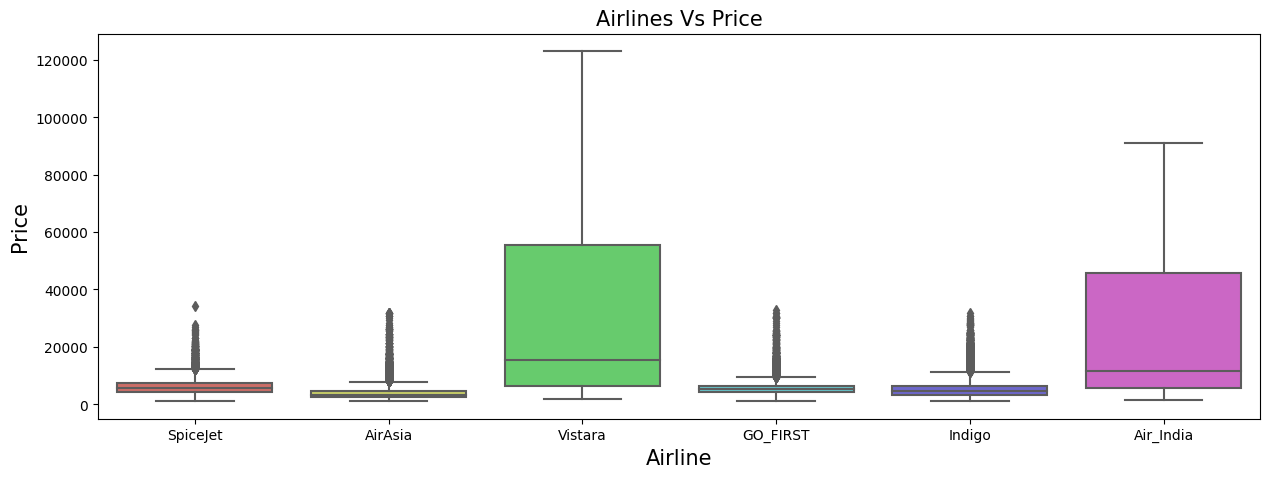

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**- Vistara has Maximum Price range.** <br>
**- Vistara and Air_India Airlines Have Maximum Price when compared to Others.** <br>
**- SpiceJet , AirAsia , GO_First and Indigo has some what equal prices.**

### Variation in Ticket Price with respect to Class of the ticket

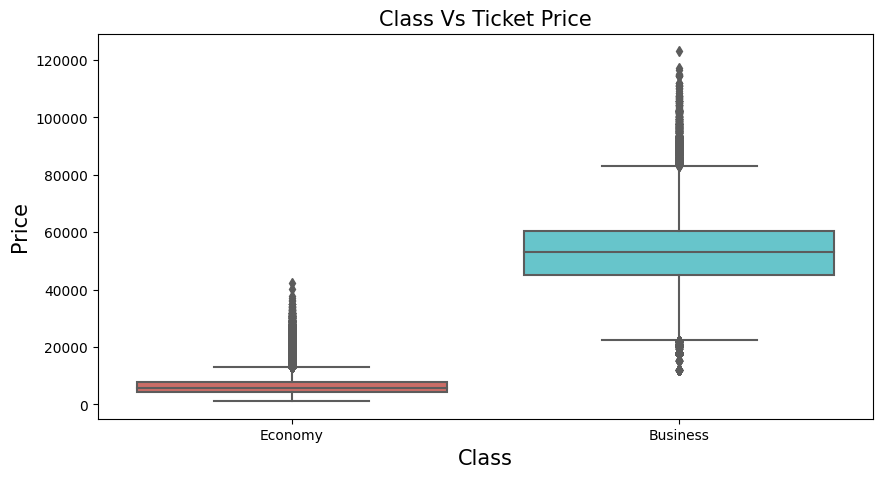

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**- Ticket Price is Maximum for Bussiness Class When compared to Economy Class**

### Variation in Ticket Price with respect to Total number of stops for the flight

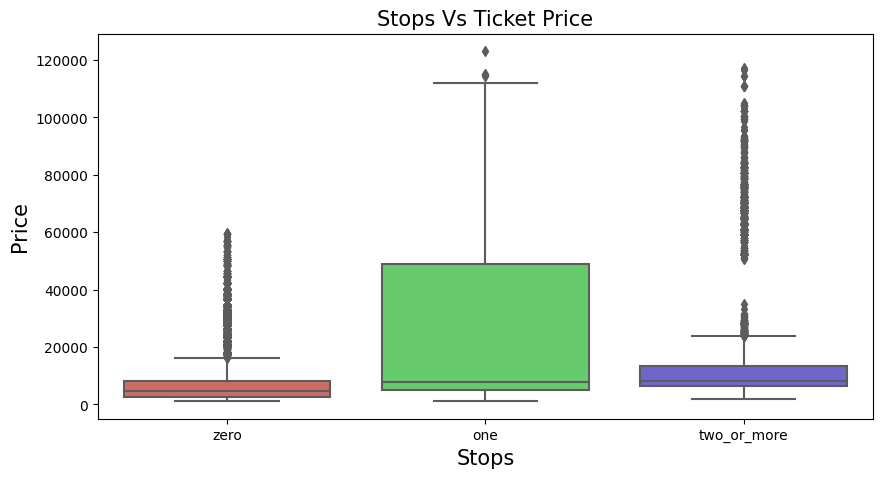

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**- Flights having one stop has maximum ticket price**

### Variation in Ticket Price with respect to the Departure Time of the flight

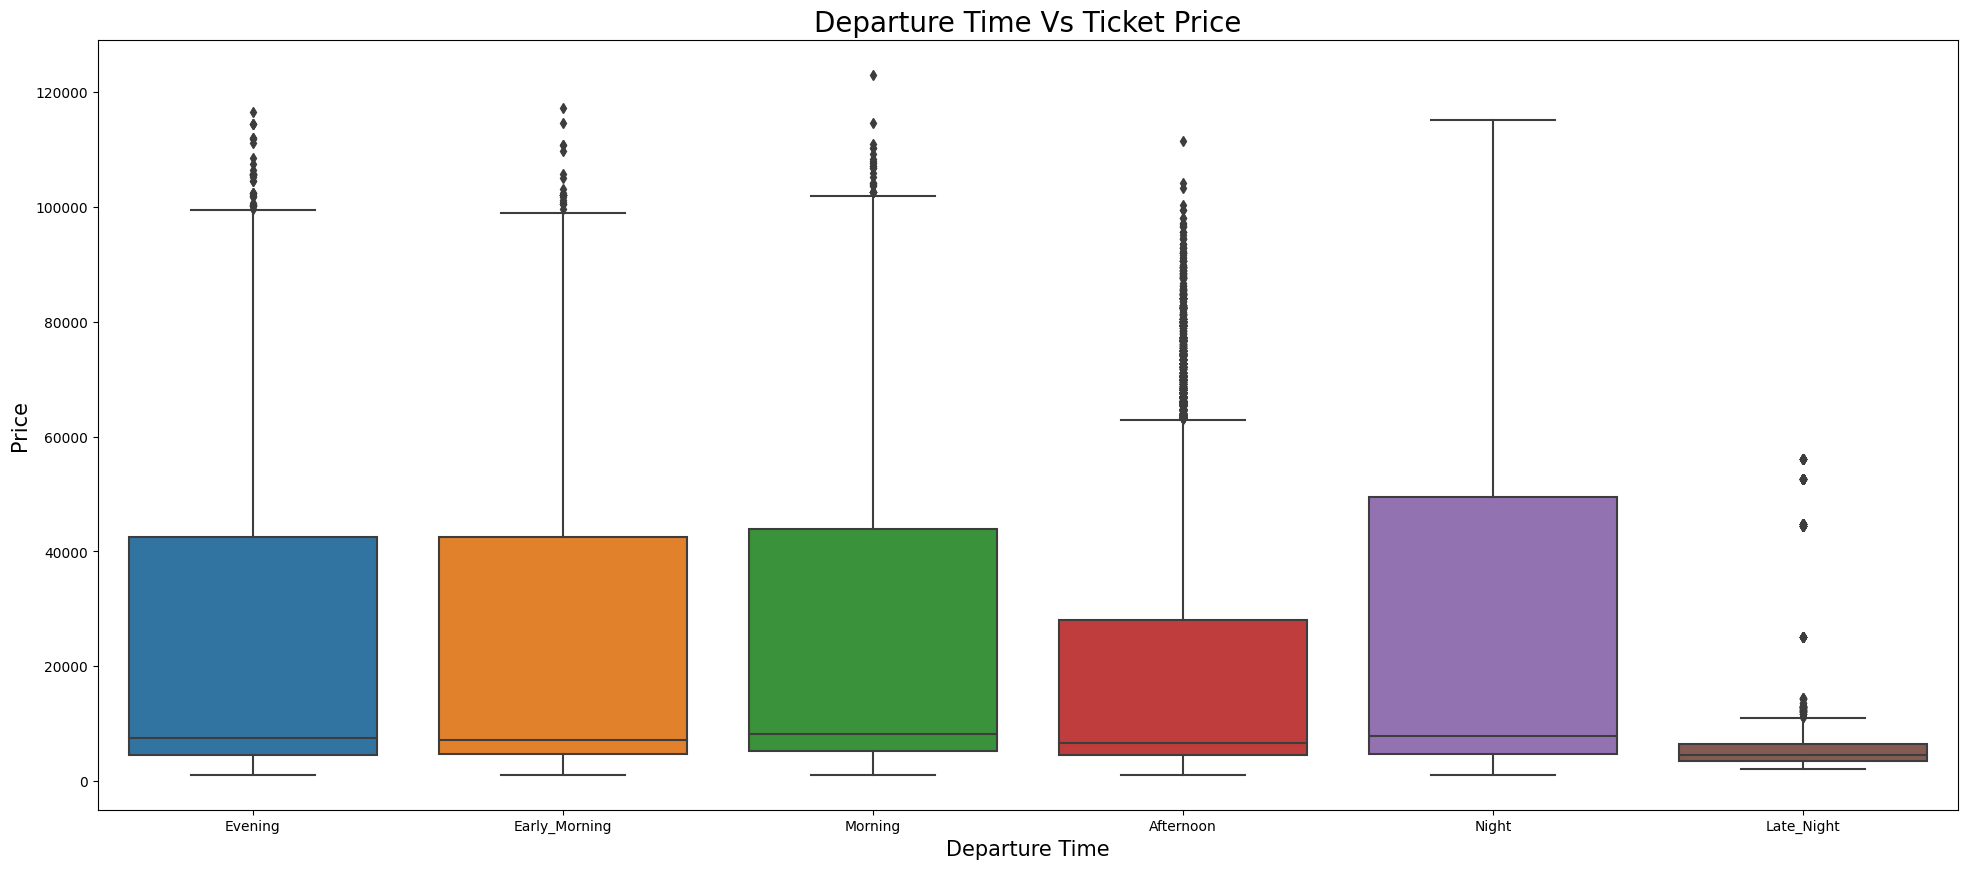

In [14]:
plt.figure(figsize=(24,10))
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**- Ticket Price is More for the Flights when the Departure Time is at Night** <br>
**- Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening** <br>
**- Ticket Price is Low for the Flights Having Departure Time at Late_night**

### Variation in Ticket Price with respect to the Arrival Time of the flight

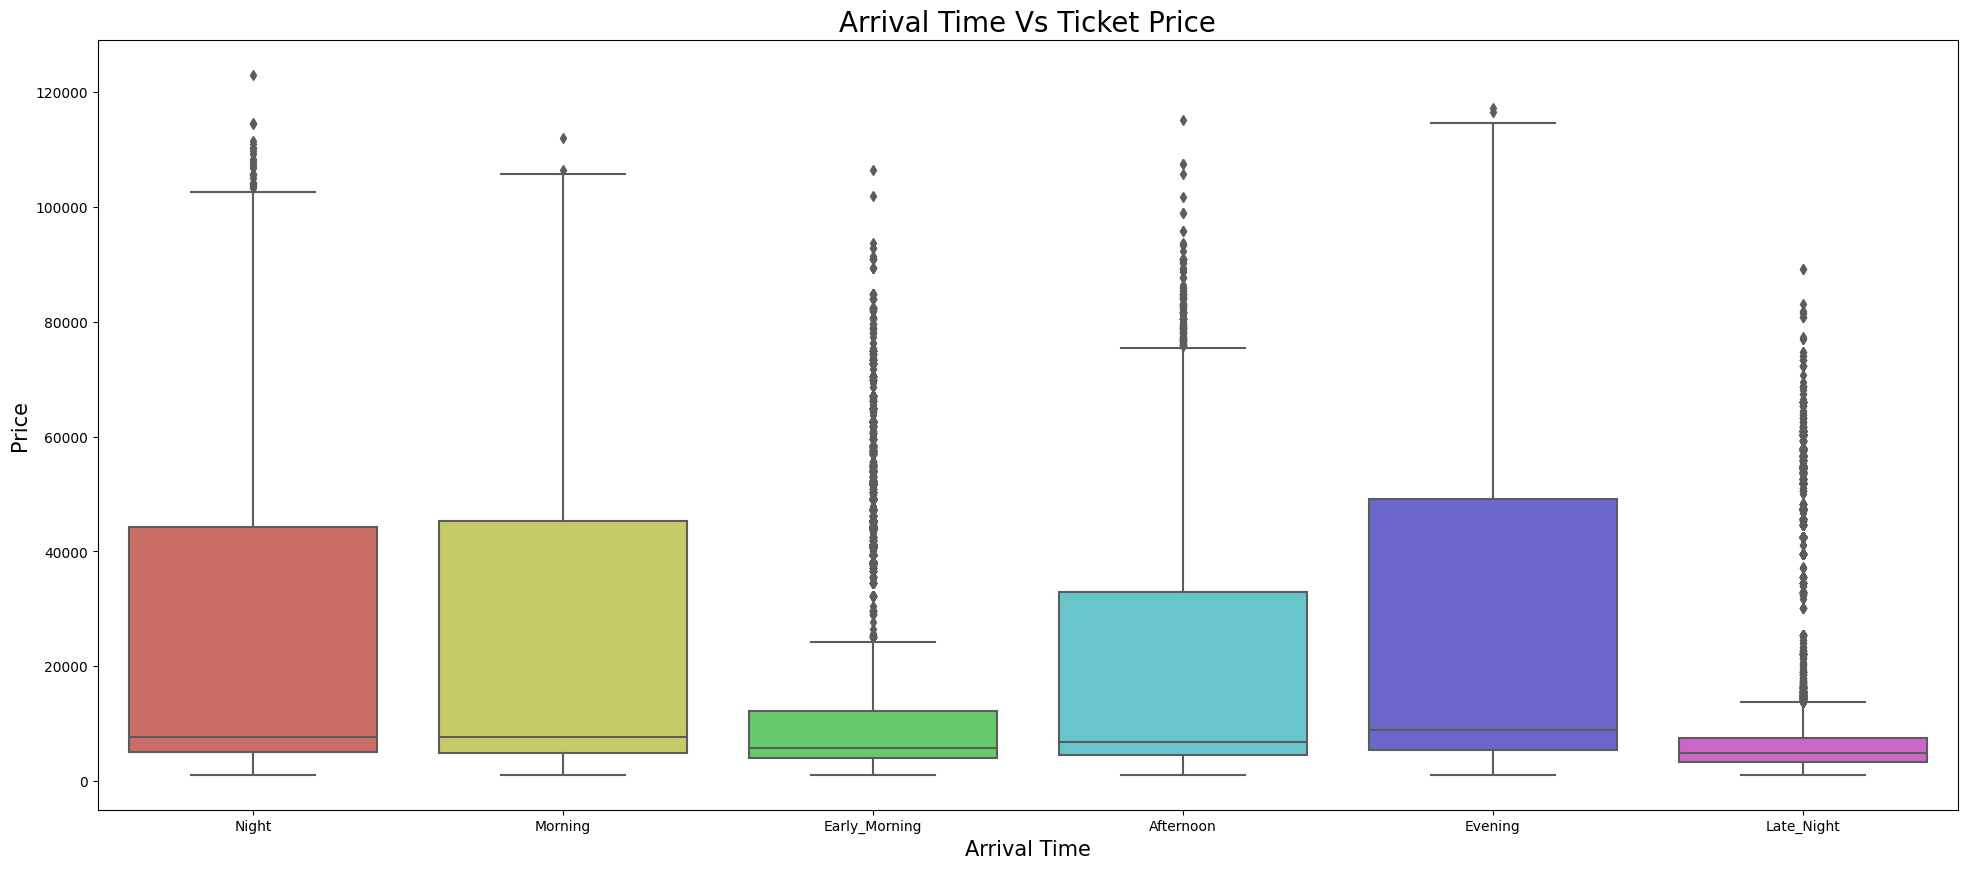

In [15]:
plt.figure(figsize=(24,10))
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**- Ticket Price is More for the Flights when the Arrival Time is at Evening** <br>
**- Ticket Price is almost equal for flights Having Arrival time is at Morning and Night** <br>
**- Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time**

### Variation in Ticket Price with respect to the Departure City

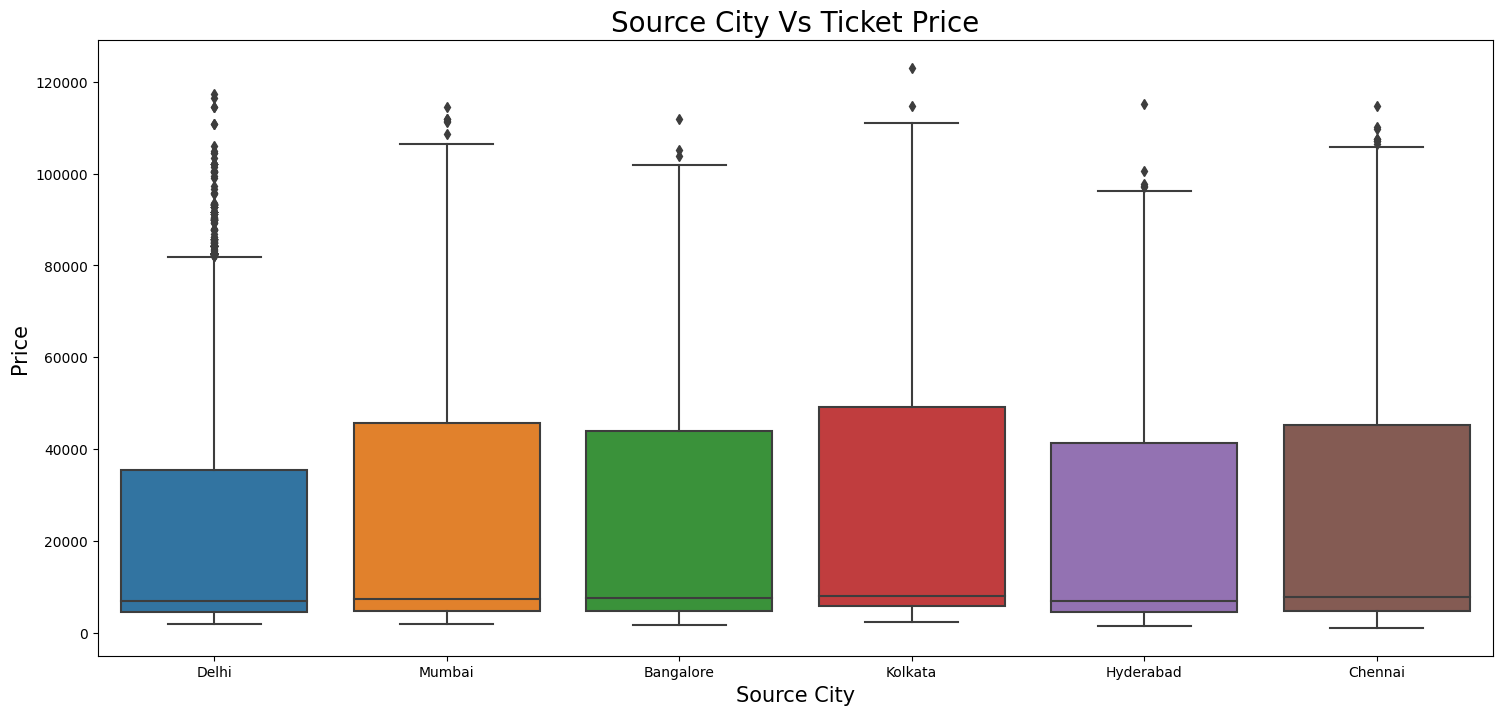

In [16]:
plt.figure(figsize=(18,8))
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**- Ticket Price is More for the Flights whose Source City is Kolkata** <br>
**- Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore** <br>
**- Ticket Price is Low for the Flights Having Source City as Delhi**

### Variation in Ticket Price with respect to the Destination City

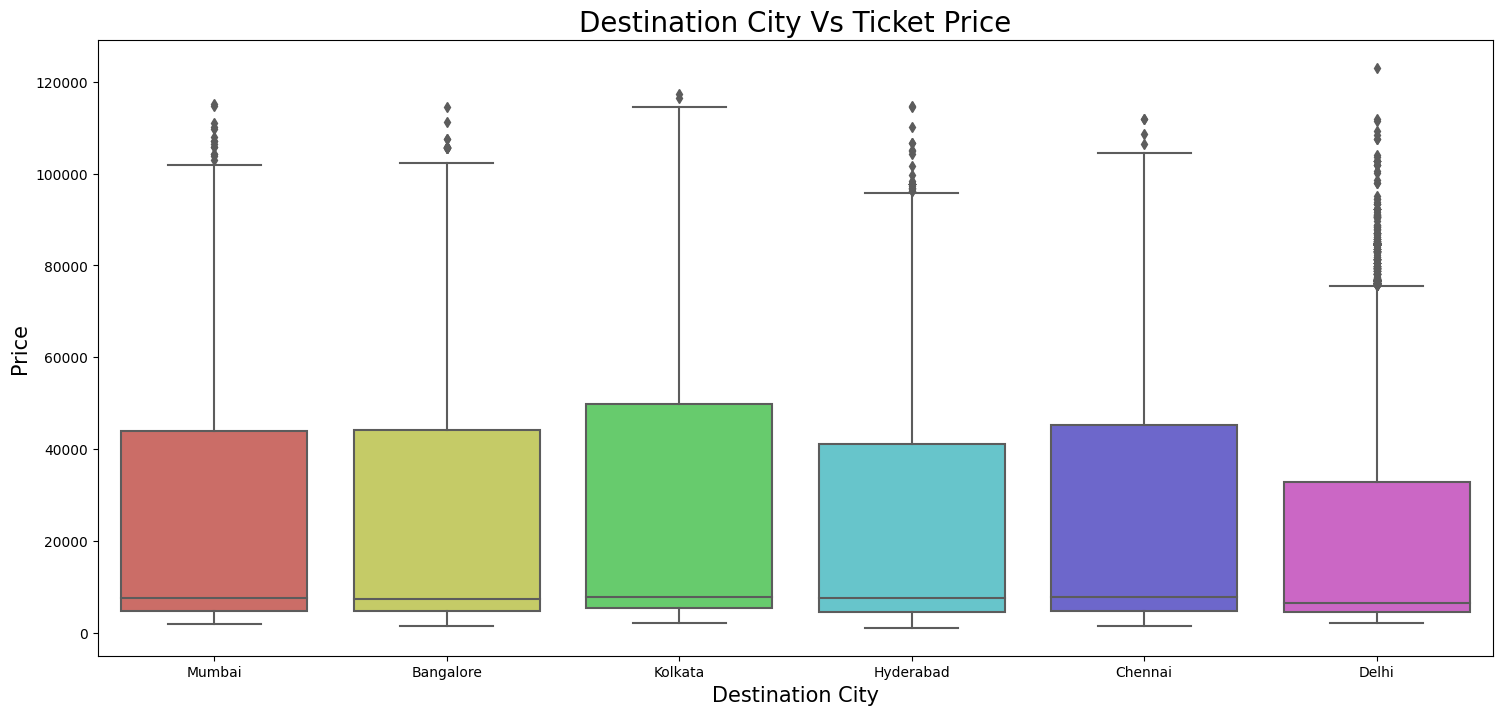

In [17]:
plt.figure(figsize=(18,8))
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**- Ticket Price is More for the Flights whose Destination City is Kolkata and Chennai** <br>
**- Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore** <br>
**- Ticket Price is Low for the Flights Having Destination City as Delhi**

### Variation in Ticket Price with respect to the Flight Duration and Class of the flight

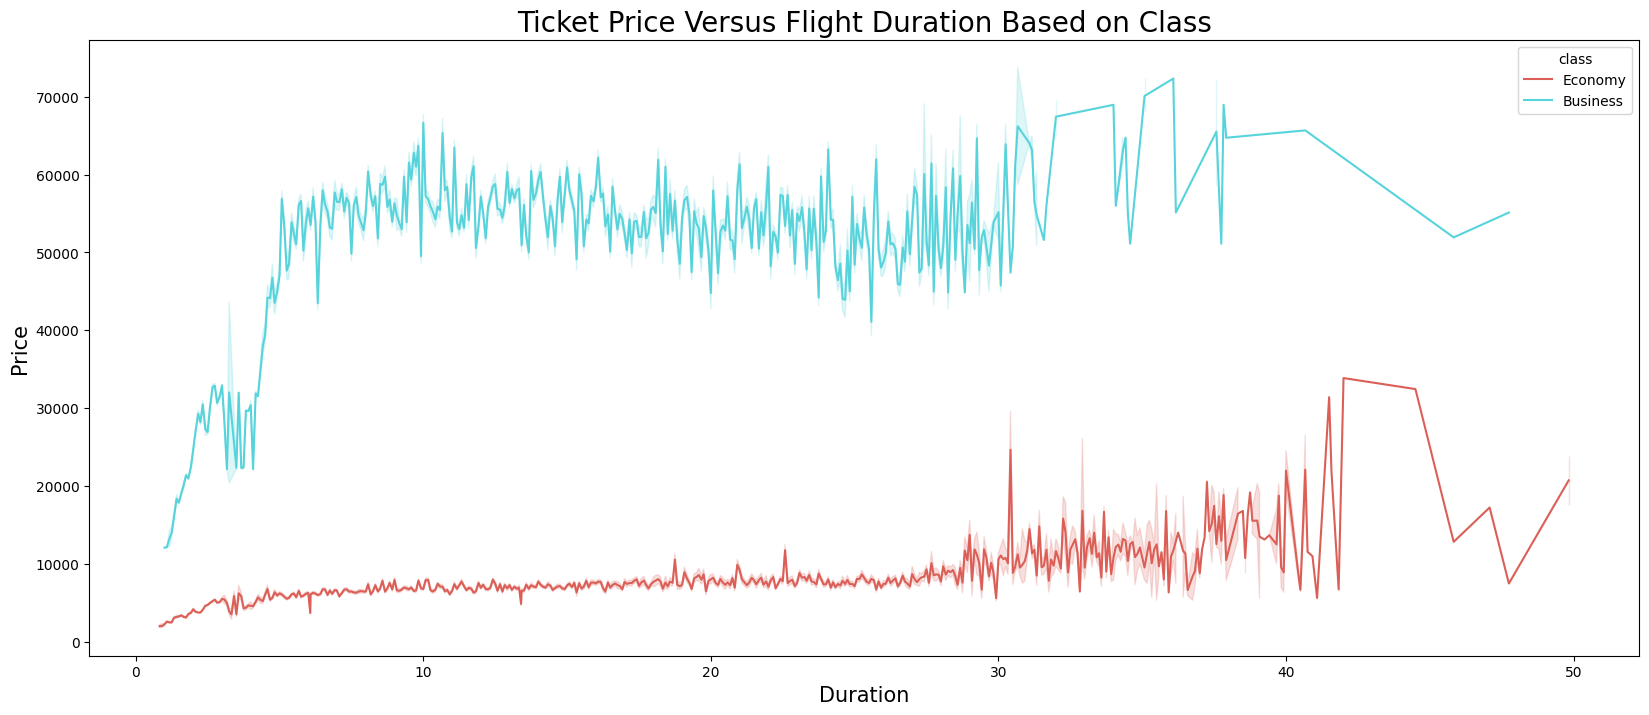

In [18]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**- With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes**

### Variation in Ticket Price with respect to the number of days left for Departure for each airline

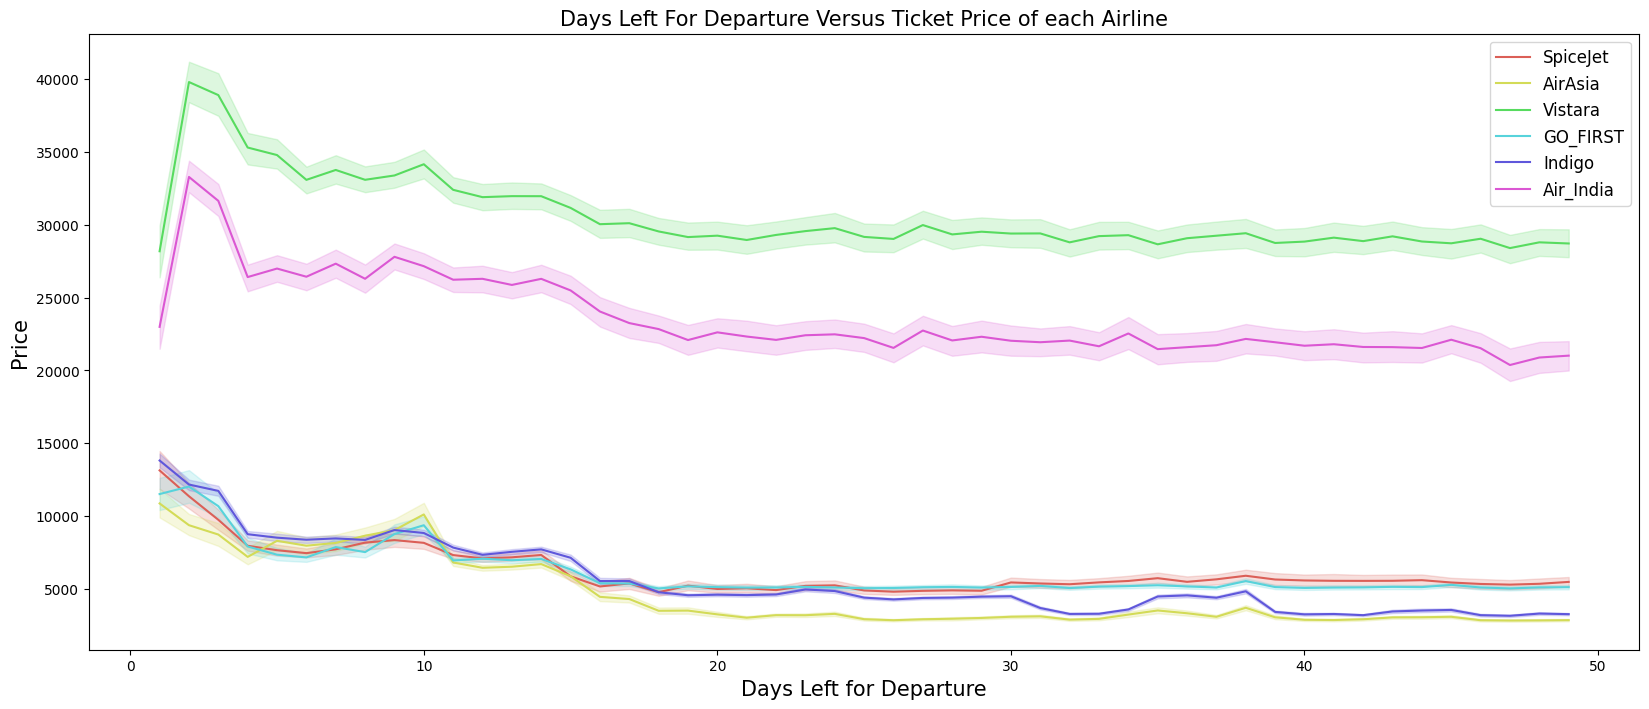

In [19]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**- When there are two days remaining for departure then the Ticket Price is very High for all airlines**

### Total number of Flights from one city to another

In [20]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count()

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


### Average Price of different Airlines from Source city to Destination city

In [21]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean()

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
...,...,...,...,...
172,Vistara,Mumbai,Bangalore,35029.880315
173,Vistara,Mumbai,Chennai,32181.946251
174,Vistara,Mumbai,Delhi,26402.695114
175,Vistara,Mumbai,Hyderabad,29497.578017


### Creating a copy of the original Dataset 

In [22]:
df_bk=df.copy()
df_bk.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Coverting the labels into a numeric form using Label Encoder

In [23]:
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

### Storing the Dependent Variables in X and Independent Variable in Y

In [24]:
x=df.drop(['price'],axis=1)
y=df['price']

### Splitting the Data into Training set and Testing Set

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

### Scaling the values to convert the int values to Machine Languages

In [26]:
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

### Storing the Performance Metrics of the Machine Learning model

In [27]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


### Build the Regression models

In [28]:
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()

### Evalution matrix for all the algorithms

In [29]:
MM = [modelmlg, modeldcr, modelrfr]

In [30]:
for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = pd.concat([Results,pd.DataFrame([new_row])],ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1268.041
Mean Squared Error (MSE): 13897365.256
Root Mean Squared Error (RMSE): 3727.917
R2_score: 0.972997
Root Mean Squared Log Error (RMSLE): 8.224
Mean Absolute Percentage Error (MAPE): 8.59 %
Adj R Square:  0.972996
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1169.826
Mean Squared Error (MSE): 8190150.604
Root Mean Squared Error (RMSE): 2861.844
R2_score: 0.984086
Root Mean Squared Log Error (RMSLE): 7.959
Me

### Displaying Performance Metrics of all the Regression Models

In [31]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,RandomForestRegressor,0.984085,1169.826092,2861.843917,7.918833,8.190151e+06,7.959221,0.984086
1,DecisionTreeRegressor,0.972996,1268.041321,3727.917013,8.594519,1.389737e+07,8.223605,0.972997
2,LinearRegression,0.904653,4630.295614,7005.015436,43.888567,4.907024e+07,8.854382,0.904656


**From the Above Results, the best fit model by comparing Errors - Adj_R_Square and R2_Score values is -  RandomForestRegressor**

### Training the Data with Random Forest Regressor

In [32]:
modelrfr.fit(x_train, y_train)

RandomForestRegressor()

### Predict the model with Test data

In [33]:
y_pred = modelrfr.predict(x_test)

### Showcasing the predicted values of Price along with the actual values

In [34]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
296892,Air_India,AI-440,Chennai,Early_Morning,one,Evening,Kolkata,Business,13.00,23,55377,55377,54691.56
196269,Air_India,AI-538,Chennai,Night,one,Morning,Bangalore,Economy,12.58,32,5888,5888,5909.62
70710,Vistara,UK-928,Mumbai,Early_Morning,one,Evening,Hyderabad,Economy,10.00,4,14448,14448,10393.44
9704,Vistara,UK-899,Delhi,Afternoon,one,Night,Mumbai,Economy,8.25,48,5227,5227,5244.00
161600,Vistara,UK-659,Hyderabad,Morning,one,Night,Mumbai,Economy,10.58,23,8345,8345,9276.03
290536,Air_India,AI-539,Chennai,Evening,one,Evening,Mumbai,Business,27.00,5,61649,61649,62920.12
259574,Vistara,UK-852,Bangalore,Morning,one,Morning,Chennai,Business,26.33,17,44280,44280,44420.02
25890,AirAsia,I5-548,Delhi,Early_Morning,zero,Early_Morning,Kolkata,Economy,2.42,34,3999,3999,4054.22
191388,Indigo,6E-6113,Chennai,Afternoon,one,Evening,Mumbai,Economy,5.33,31,3352,3352,2722.32
237557,Air_India,AI-888,Mumbai,Evening,one,Evening,Kolkata,Business,24.17,44,49725,49725,49725.00


### Graphical Representation of Actual Flight Price Vs Predicted Flight Price

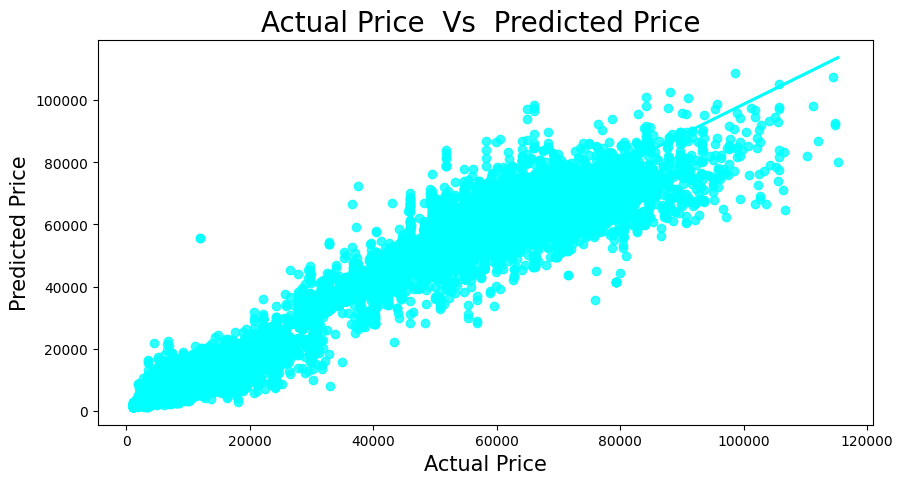

In [35]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

### Storing the results in a Data Frame

In [36]:
result.to_excel(r"C:\Users\Dell\OneDrive\Documents\Flight Price Prediction\Actual_Vs_Predicted_Price.xlsx",header=True, index=False)